In [15]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df=pd.read_csv("../data_cleaning/OSMI_clean.csv")
df.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
0,1.0,No,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Yes,Yes,100-500,1.0,"Yes, I experienced","Yes, I experienced",27.0,Female,United Kingdom,NaN,2017
1,1.0,Yes,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Maybe,Yes,100-500,2.0,"Yes, I observed",Maybe/Not sure,31.0,male,United Kingdom,NaN,2017
2,1.0,I don't know,No,Yes,Yes,Yes,1.0,Yes,Difficult,Yes,Maybe,6-25,1.0,"Yes, I experienced","Yes, I experienced",36.0,male,United States of America,White,2017
3,1.0,Yes,Yes,Yes,Yes,I don't know,1.0,Yes,Difficult,Yes,Yes,More than 1000,2.0,Maybe/Not sure,Maybe/Not sure,22.0,Male,United States of America,White,2017
4,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,No,"Yes, I observed",52.0,female,United States of America,More than one of the above,2017


In [49]:
df.groupby(['year'])['comfortable discussing a mental health issue with direct supervisor(s)'].count()

year
2017    643
2018    361
2019    304
2020    155
2021    114
Name: comfortable discussing a mental health issue with direct supervisor(s), dtype: int64

In [29]:
df_2018=df.loc[df['year']==2018]
df_2018.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
756,1.0,Yes,Yes,Possibly,NaN,Yes,1.0,Yes,Somewhat difficult,No,No,More than 1000,2.0,"Yes, I observed","Yes, I observed",57.0,Female,Canada,NaN,2018
757,1.0,Yes,Yes,Yes,Yes,Yes,0.0,I don't know,Somewhat difficult,No,No,More than 1000,3.0,No,No,29.0,male,United States of America,White,2018
758,0.0,Yes,Yes,No,NaN,Yes,0.0,I don't know,Somewhat easy,No,No,6-25,3.0,No,Maybe/Not sure,46.0,Male,United States of America,White,2018
759,1.0,No,No,No,NaN,No,0.0,I don't know,Neither easy nor difficult,No,Maybe,6-25,1.0,No,Maybe/Not sure,34.0,male,Norway,NaN,2018
760,1.0,Yes,Yes,Yes,Yes,Yes,1.0,Yes,Somewhat easy,Yes,Yes,26-100,4.0,"Yes, I observed","Yes, I observed",29.0,Ostensibly Male,United States of America,White,2018


In [28]:
support_2018=df_2018['how well do you think the tech industry supports employees with mental health issues'].value_counts().to_frame()
support_2018=support_2018.sort_values(by=['how well do you think the tech industry supports employees with mental health issues'])
support_2018['2018 Percentage']=(support_2018['count'])/(support_2018['count'].sum())*100
support_2018=support_2018.rename(columns={'count': '2018 count'})
support_2018

,2018 count,2018 Percentage
how well do you think the tech industry supports employees with mental health issues,,
1.0,66,15.827338
2.0,133,31.894484
3.0,156,37.410072
4.0,57,13.669065
5.0,5,1.199041


In [56]:
df_2021=df.loc[df['year']==2021]
df_2021.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
1705,1.0,I don't know,No,Possibly,NaN,I don't know,0.0,I don't know,Very easy,Maybe,No,26-100,2.0,No,No,28.0,Female,United States of America,White,2021
1706,1.0,Yes,No,No,NaN,No,0.0,Yes,I don't know,No,Maybe,500-1000,3.0,"Yes, I observed","Yes, I observed",41.0,male,Brazil,NaN,2021
1707,1.0,Yes,Yes,No,NaN,No,0.0,I don't know,Somewhat easy,Maybe,Yes,100-500,3.0,No,Maybe/Not sure,35.0,Male,Brazil,NaN,2021
1708,NaN,NaN,NaN,Don't Know,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Maybe/Not sure,"Yes, I observed",20.0,male,Italy,NaN,2021
1709,0.0,Yes,No,No,NaN,No,0.0,I don't know,Difficult,No,Maybe,More than 1000,3.0,No,Maybe/Not sure,35.0,female,Canada,NaN,2021


In [57]:
support_2021=df_2021['how well do you think the tech industry supports employees with mental health issues'].value_counts().to_frame()
support_2021=support_2021.sort_values(by=['how well do you think the tech industry supports employees with mental health issues'])
support_2021['2021 Percentage']=(support_2021['count'])/(support_2021['count'].sum())*100
support_2021=support_2021.rename(columns={'count': '2021 count'})
support_2021

,2021 count,2021 Percentage
how well do you think the tech industry supports employees with mental health issues,,
1.0,20,15.267176
2.0,35,26.717557
3.0,50,38.167939
4.0,20,15.267176
5.0,6,4.580153


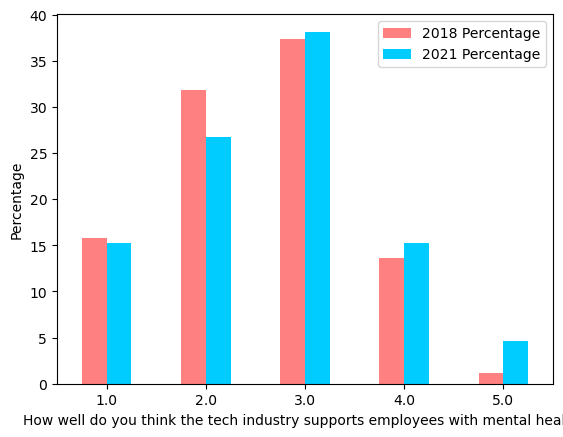

In [71]:
merged_df=pd.merge(support_2018, support_2021, on=['how well do you think the tech industry supports employees with mental health issues'])
ax = merged_df.plot.bar(rot=0, y=['2018 Percentage', '2021 Percentage'], xlabel='How well do you think the tech industry supports employees with mental health?', 
                        ylabel='Percentage', color={'2018 Percentage': '#FF8080', '2021 Percentage': '#00CCFF'})
plt.savefig('Output/q3_chart1.png')

In [59]:
discuss_2018=df_2018['comfortable discussing a mental health issue with direct supervisor(s)'].value_counts().to_frame()
discuss_2018['2018 Percentage']=(discuss_2018['count'])/(discuss_2018['count'].sum())*100
discuss_2018=discuss_2018.rename(columns={'count': '2018 count'})
discuss_2018

,2018 count,2018 Percentage
comfortable discussing a mental health issue with direct supervisor(s),,
Yes,131,36.288089
Maybe,117,32.409972
No,113,31.301939


In [64]:
discuss_2021=df_2021['comfortable discussing a mental health issue with direct supervisor(s)'].value_counts().to_frame()
discuss_2021['2021 Percentage']=(discuss_2021['count'])/(discuss_2021['count'].sum())*100
discuss_2021=discuss_2021.rename(columns={'count': '2021 count'})
discuss_2021

,2021 count,2021 Percentage
comfortable discussing a mental health issue with direct supervisor(s),,
No,44,38.596491
Yes,36,31.578947
Maybe,34,29.824561


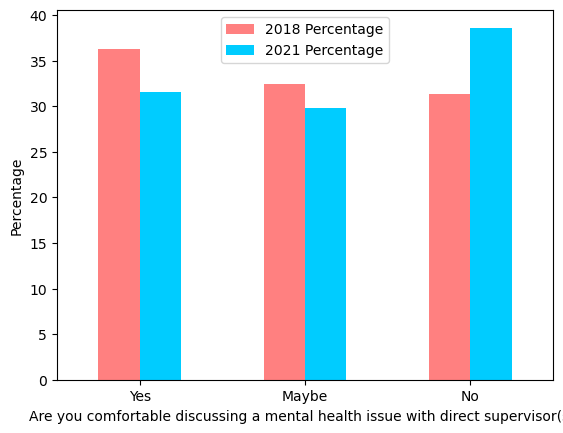

In [70]:
discuss_merged_df=pd.merge(discuss_2018, discuss_2021, on=['comfortable discussing a mental health issue with direct supervisor(s)'])
ax = discuss_merged_df.plot.bar(rot=0, y=['2018 Percentage', '2021 Percentage'], xlabel='Are you comfortable discussing a mental health issue with direct supervisor(s)?', 
                        ylabel='Percentage', color={'2018 Percentage': '#FF8080', '2021 Percentage': '#00CCFF'})
plt.savefig('Output/q3_chart2.png')